# Laboratorio 7
## Esercizio 07.1
Nell'algoritmo Metropolis di dinamica molecolare NVT (ensamble canonico), ogni step si serve della distribuzione uniforme come probabilità di transizione $T(\vec x|\vec y)$ (scelgo un passo $a$ che riesca a mantenere l'acceptance al $50\%$ circa) e campiona coordinate che seguono la distribuzione di Boltzmann
$$p(q,p)=\frac{e^{-H(q,p)/k_BT}}{Q_N(V,T)},$$
dove $Q_N(V,T)$ è la funzione di partizione.

Dopo una prima fase di equilibrazione con $n_{equil}=100$ step eseguo $n_{insta}=5\times10^5$ valutazioni di energia interna e pressione. Utilizzo questi valori per calcolara l'autocorrelazione delle due quantità, sapendo che per valori di tempo discreti vale
$$
AC_{x}(t_i)=\frac{\sum_{j=0}^{N-i-1}(x(t_j)-\mu)\times(x(t_{j+i})-\mu)}{\sum_{j=0}^{N-1}(x(t_j)-\mu)^2};
$$
l'autocorrelazione mi dà una stima di quanto grandi devono essere i blocchi da utilizzare per la media a blocchi per garantire l'indipendenza dei dati. Mostro, infine, una stima dell'errore che mi aspetto al variare del numero di punti in ogni blocco ($n_{step\ block}\in[10,5\times10^3]$):
$$ \sigma_{\langle g\rangle}=\sqrt{\frac{1}{n_{blocks}-1}\left(\left\langle g^2\right\rangle-\left\langle g\right\rangle^2\right)}=\sqrt{\frac{1}{n_{blocks}-1}\left[\frac1{n_{blocks}}\sum_{i=1}^{n_{blocks}}g_i^2-\left(\frac1{n_{blocks}}\sum_{i=1}^{n_{blocks}}g_i\right)^2\right]}.$$

Nelle simulazioni considero le tre fasi:
- solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off: $r_c = 2.2$);
- liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off: $r_c = 2.5$);
- gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off: $r_c = 5.0$).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [178]:
def autocorrelation(x):
    autocorr = np.zeros(len(x))
    xp = np.zeros(len(x))
    
    mean = np.mean(x)
    var = np.var(x)
    xp = x - mean
    
    for i in range(len(xp)-1):
        
        # let's rewrite the autocorrelation function as
        #(sum of xp_l*xp_{i+l})/(sum of xp_l*xp_l)
        #l is at most len-i-1
        autocorr[i] = np.dot(xp[:len(xp)-i], xp[i:]) #sum of xp_l*xp_{i+l}
        
    sum_2 = np.dot(xp, xp) #sum of xp_l*xp_l
    autocorr = autocorr/sum_2
    
    return autocorr

def blk_error(x, nstep):
    nblk = int(len(x)/nstep)
    
    ave = np.zeros(nblk)
    av2 = np.zeros(nblk)
    
    glb_ave = 0
    glb_av2 = 0
    
    for i in range(nblk):
        ave[i] = np.sum(x[i*nstep:(i+1)*nstep])
    
    ave = ave/nstep
    av2 = ave*ave
    
    glb_ave = np.sum(ave)
    glb_av2 = np.sum(av2)
    
    final_error = np.sqrt((glb_av2/nblk - (glb_ave/nblk)**2)/(nblk-1))
    return final_error


epot_solid = np.loadtxt('output/solid/instantaneus.epot.0')
pres_solid = np.loadtxt('output/solid/instantaneus.pres.0')
epot_liquid = np.loadtxt('output/liquid/instantaneus.epot.0')
pres_liquid = np.loadtxt('output/liquid/instantaneus.pres.0')
epot_gas = np.loadtxt('output/gas/instantaneus.epot.0')
pres_gas = np.loadtxt('output/gas/instantaneus.pres.0')

A_epot = [epot_solid[i] for i in range(8000)]
A_pres = [pres_solid[i] for i in range(8000)]
autocorr_epot_solid = autocorrelation(A_epot)
autocorr_pres_solid = autocorrelation(A_pres)

block_step = []
errors_u_solid = []
errors_p_solid = []

for i in range (10, 5000,10):
    block_step.append(i)
    errors_u_solid.append(blk_error(epot_solid, i))
    errors_p_solid.append(blk_error(pres_solid, i))
    
A_epot = [epot_liquid[i] for i in range(8000)]
A_pres = [pres_liquid[i] for i in range(8000)]
autocorr_epot_liquid = autocorrelation(A_epot)
autocorr_pres_liquid = autocorrelation(A_pres)

errors_u_liquid = []
errors_p_liquid = []

for i in range (10, 5000,10):
    errors_u_liquid.append(blk_error(epot_liquid, i))
    errors_p_liquid.append(blk_error(pres_liquid, i))
    
A_epot = [epot_gas[i] for i in range(8000)]
A_pres = [pres_gas[i] for i in range(8000)]
autocorr_epot_gas = autocorrelation(A_epot)
autocorr_pres_gas = autocorrelation(A_pres)

errors_u_gas = []
errors_p_gas = []

for i in range (10, 5000,10):
    errors_u_gas.append(blk_error(epot_gas, i))
    errors_p_gas.append(blk_error(pres_gas, i))

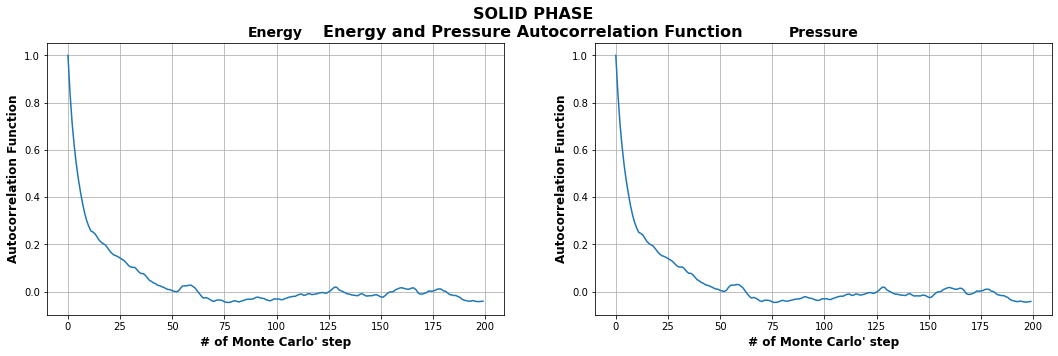

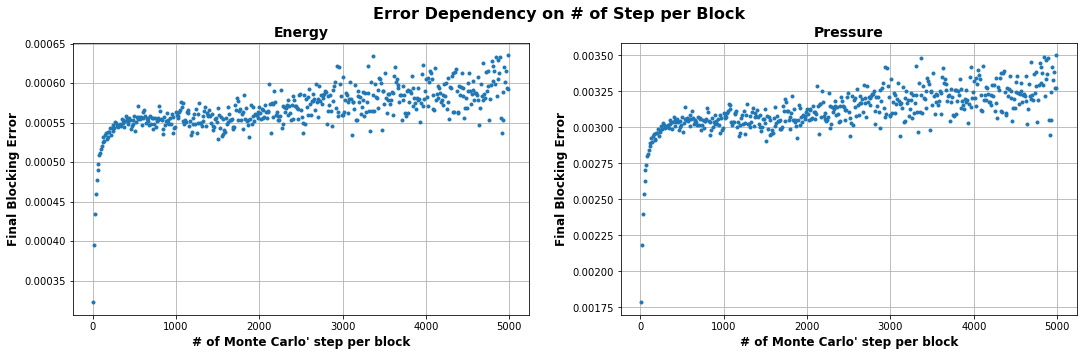

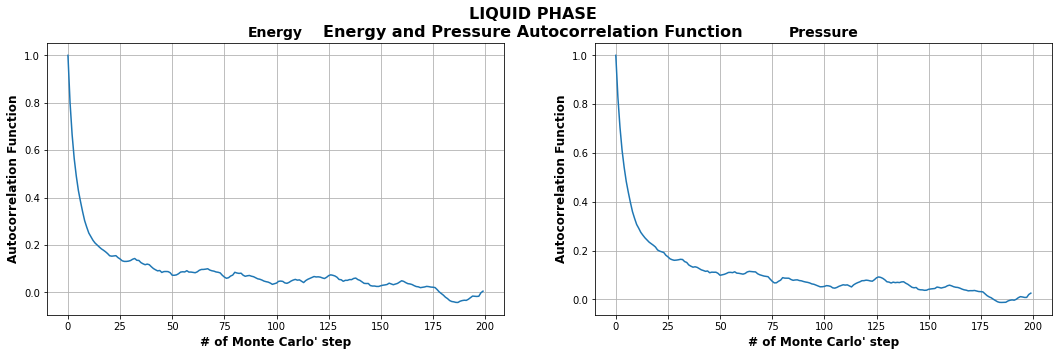

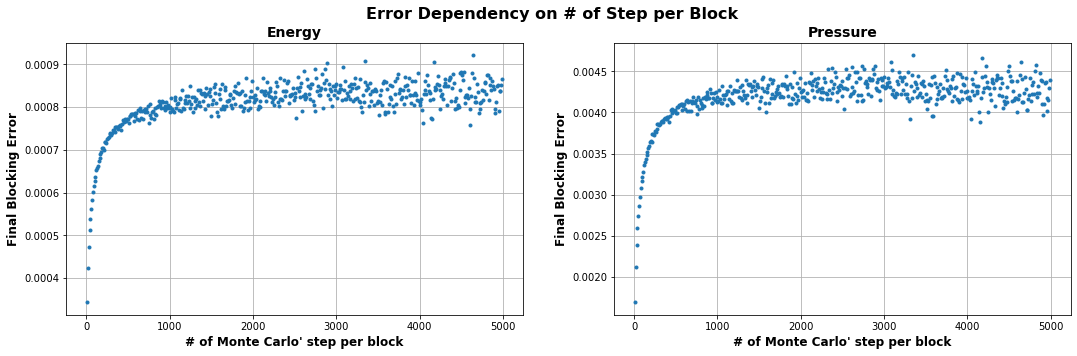

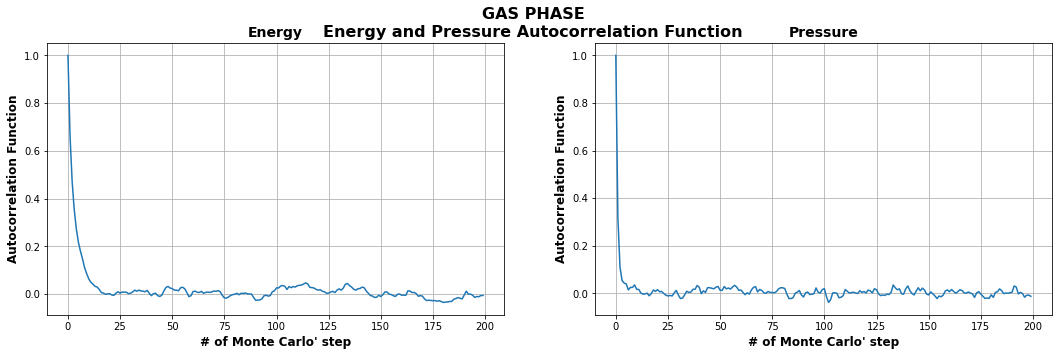

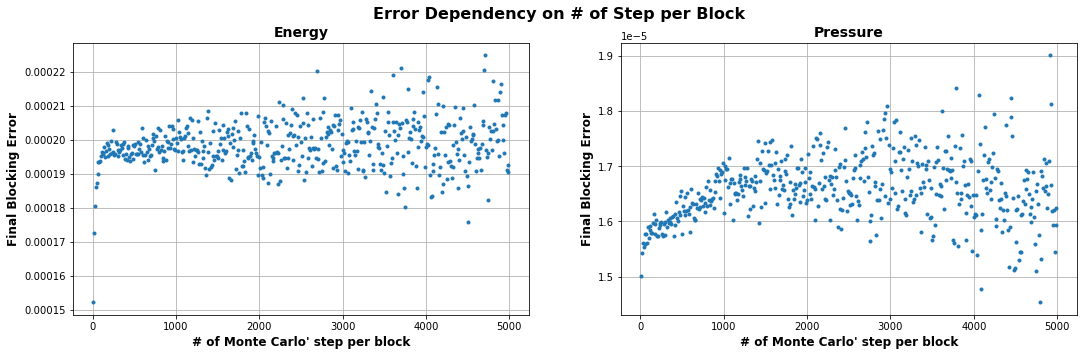

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

fig.suptitle("SOLID PHASE\nEnergy and Pressure Autocorrelation Function", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].plot(autocorr_epot_solid[:200])
ax[1].grid(True)
ax[1].plot(autocorr_pres_solid[:200])
#plt.title('Ising 1D, internal energy')
ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].grid(True)
ax[0].plot(block_step, errors_u_solid, marker = '.', linestyle = '')
ax[1].grid(True)
ax[1].plot(block_step, errors_p_solid, marker = '.', linestyle = '')
fig.suptitle('Error Dependency on # of Step per Block', fontsize=16, fontweight = 'bold')
ax[0].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

fig.suptitle("LIQUID PHASE\nEnergy and Pressure Autocorrelation Function", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].plot(autocorr_epot_liquid[:200])
ax[1].grid(True)
ax[1].plot(autocorr_pres_liquid[:200])
#plt.title('Ising 1D, internal energy')
ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].grid(True)
ax[0].plot(block_step, errors_u_liquid, marker = '.', linestyle = '')
ax[1].grid(True)
ax[1].plot(block_step, errors_p_liquid, marker = '.', linestyle = '')
fig.suptitle('Error Dependency on # of Step per Block', fontsize=16, fontweight = 'bold')
ax[0].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

fig.suptitle("GAS PHASE\nEnergy and Pressure Autocorrelation Function", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].plot(autocorr_epot_gas[:200])
ax[1].grid(True)
ax[1].plot(autocorr_pres_gas[:200])
#plt.title('Ising 1D, internal energy')
ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Autocorrelation Function', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].grid(True)
ax[0].plot(block_step, errors_u_gas, marker = '.', linestyle = '')
ax[1].grid(True)
ax[1].plot(block_step, errors_p_gas, marker = '.', linestyle = '')
fig.suptitle('Error Dependency on # of Step per Block', fontsize=16, fontweight = 'bold')
ax[0].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step per block', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel('Final Blocking Error', fontsize=12, fontweight = 'bold')
ax[0].set_title("Energy", fontsize=14, fontweight = 'bold')
ax[1].set_title("Pressure", fontsize=14, fontweight = 'bold')

plt.show()

Quando il numero di step in ogni blocco è superiore al numero di step Monte Carlo autocorrelati ($\sim100$) si nota che l'errore calcolato raggiunge il vero errore statistico dovuto alla catena di Markov. Superata questa soglia vale il teorema del limite centrale e l'errore oscilla attorno ad un valore costante. 

## Esercizi 07.2 & 07.3 & 07.4
Aggiungo al codice il calcolo della funzione di distribuzione radiale $g(r)$. Mostro i valori medi ottenuti con l'algoritmo Monte Carlo per l'energia interna e la pressione nelle tre fasi analizzate. Per la statistica ho suddiviso i dati in $n_{block}=100$ blocchi, ognuto formato da $n_{block\ step}=100$ step (per la fase gassosa ho utilizzato $n_{block\ step}=300$).

In [21]:
sigma = 0.34
epsilonKB = 120
m = 39.948
KBe23 = 1.380650324

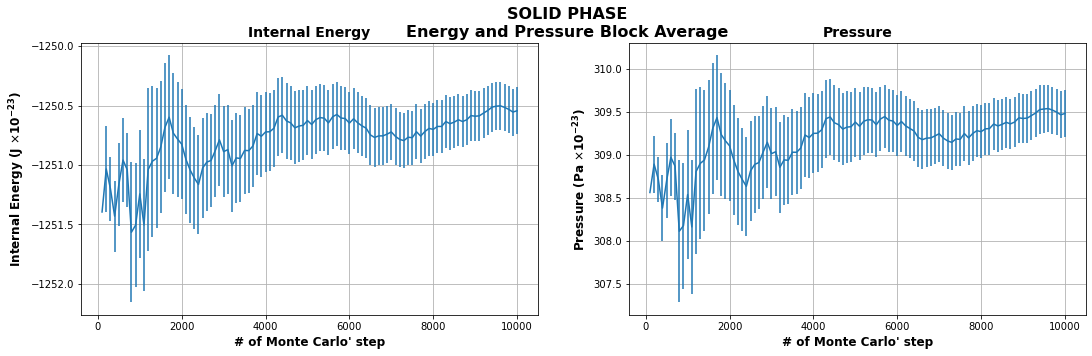

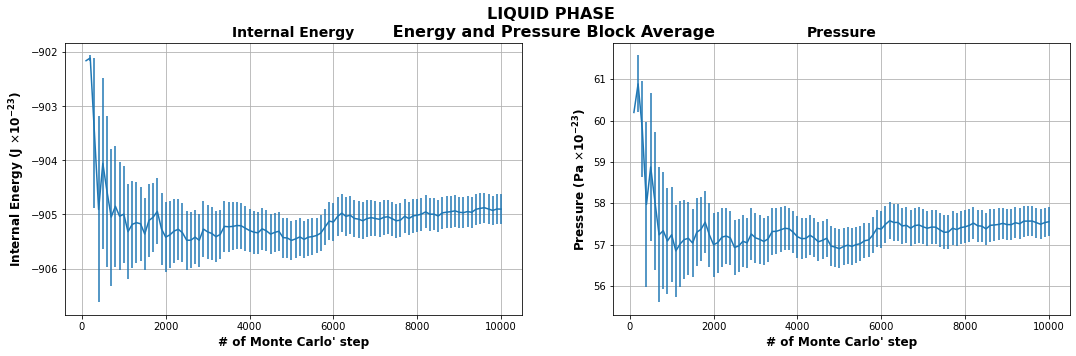

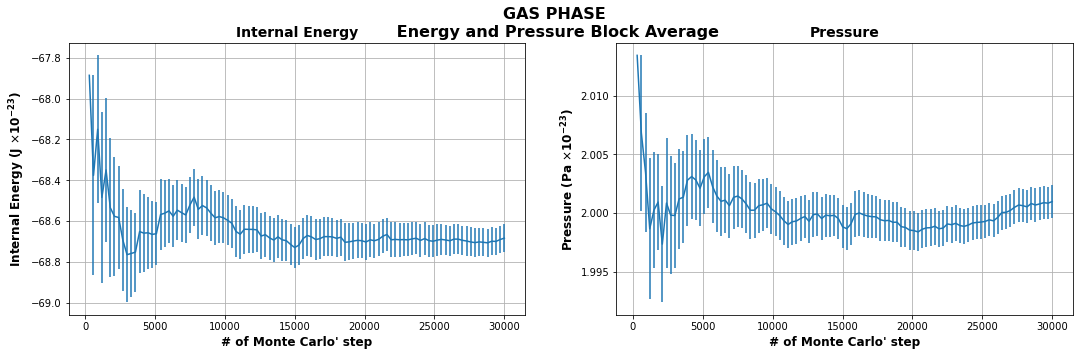

In [177]:
iblk, instant_u_solid, sum_prog_u_solid, err_prog_u_solid = np.loadtxt("output/solid/output.epot.0", unpack=True)
iblk, instant_p_solid, sum_prog_p_solid, err_prog_p_solid = np.loadtxt("output/solid/output.pres.0", unpack=True)
instant_u_solid, sum_prog_u_solid, err_prog_u_solid = instant_u_solid*epsilonKB*KBe23, sum_prog_u_solid*epsilonKB*KBe23, err_prog_u_solid*epsilonKB*KBe23
instant_p_solid, sum_prog_p_solid, err_prog_p_solid = instant_p_solid*epsilonKB*sigma, sum_prog_p_solid*epsilonKB*sigma, err_prog_p_solid*epsilonKB*sigma
iblk, instant_u_liquid, sum_prog_u_liquid, err_prog_u_liquid = np.loadtxt("output/liquid/output.epot.0", unpack=True)
iblk, instant_p_liquid, sum_prog_p_liquid, err_prog_p_liquid = np.loadtxt("output/liquid/output.pres.0", unpack=True)
instant_u_liquid, sum_prog_u_liquid, err_prog_u_liquid = instant_u_liquid*epsilonKB*KBe23, sum_prog_u_liquid*epsilonKB*KBe23, err_prog_u_liquid*epsilonKB*KBe23
instant_p_liquid, sum_prog_p_liquid, err_prog_p_liquid = instant_p_liquid*epsilonKB*sigma, sum_prog_p_liquid*epsilonKB*sigma, err_prog_p_liquid*epsilonKB*sigma
iblk, instant_u_gas, sum_prog_u_gas, err_prog_u_gas = np.loadtxt("output/gas/output.epot.0", unpack=True)
iblk, instant_p_gas, sum_prog_p_gas, err_prog_p_gas = np.loadtxt("output/gas/output.pres.0", unpack=True)
instant_u_gas, sum_prog_u_gas, err_prog_u_gas = instant_u_gas*epsilonKB*KBe23, sum_prog_u_gas*epsilonKB*KBe23, err_prog_u_gas*epsilonKB*KBe23
instant_p_gas, sum_prog_p_gas, err_prog_p_gas = instant_p_gas*epsilonKB*sigma, sum_prog_p_gas*epsilonKB*sigma, err_prog_p_gas*epsilonKB*sigma

fig, ax = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("SOLID PHASE\nEnergy and Pressure Block Average", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].errorbar(iblk*100,sum_prog_u_solid,yerr=err_prog_u_solid)
ax[1].grid(True)
ax[1].errorbar(iblk*100,sum_prog_p_solid,yerr=err_prog_p_solid)

ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel(r'Internal Energy (J $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[0].set_title('Internal Energy', fontsize=14, fontweight = 'bold')
ax[1].set_title('Pressure', fontsize=14, fontweight = 'bold')


fig, ax = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("LIQUID PHASE\n Energy and Pressure Block Average", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].errorbar(iblk*100,sum_prog_u_liquid,yerr=err_prog_u_liquid)
ax[1].grid(True)
ax[1].errorbar(iblk*100,sum_prog_p_liquid,yerr=err_prog_p_liquid)

ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel(r'Internal Energy (J $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[0].set_title('Internal Energy', fontsize=14, fontweight = 'bold')
ax[1].set_title('Pressure', fontsize=14, fontweight = 'bold')


fig, ax = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("GAS PHASE\n Energy and Pressure Block Average", fontsize=16, fontweight = 'bold')

ax[0].grid(True)
ax[0].errorbar(iblk*300,sum_prog_u_gas,yerr=err_prog_u_gas)
ax[1].grid(True)
ax[1].errorbar(iblk*300,sum_prog_p_gas,yerr=err_prog_p_gas)

ax[0].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[1].set_xlabel('# of Monte Carlo\' step', fontsize=12, fontweight = 'bold')
ax[0].set_ylabel(r'Internal Energy (J $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[1].set_ylabel(r'Pressure (Pa $\times\mathbf{10^{-23}}$)', fontsize=12, fontweight = 'bold')
ax[0].set_title('Internal Energy', fontsize=14, fontweight = 'bold')
ax[1].set_title('Pressure', fontsize=14, fontweight = 'bold')

plt.show()



Procedo confrontando i risultati ottenuti per la funzione di distribuzione radiale $g(r)$ utilizzando l'algoritmo Monte Carlo NVT ed utilizzando l'algoritmo di Verlet NVE.

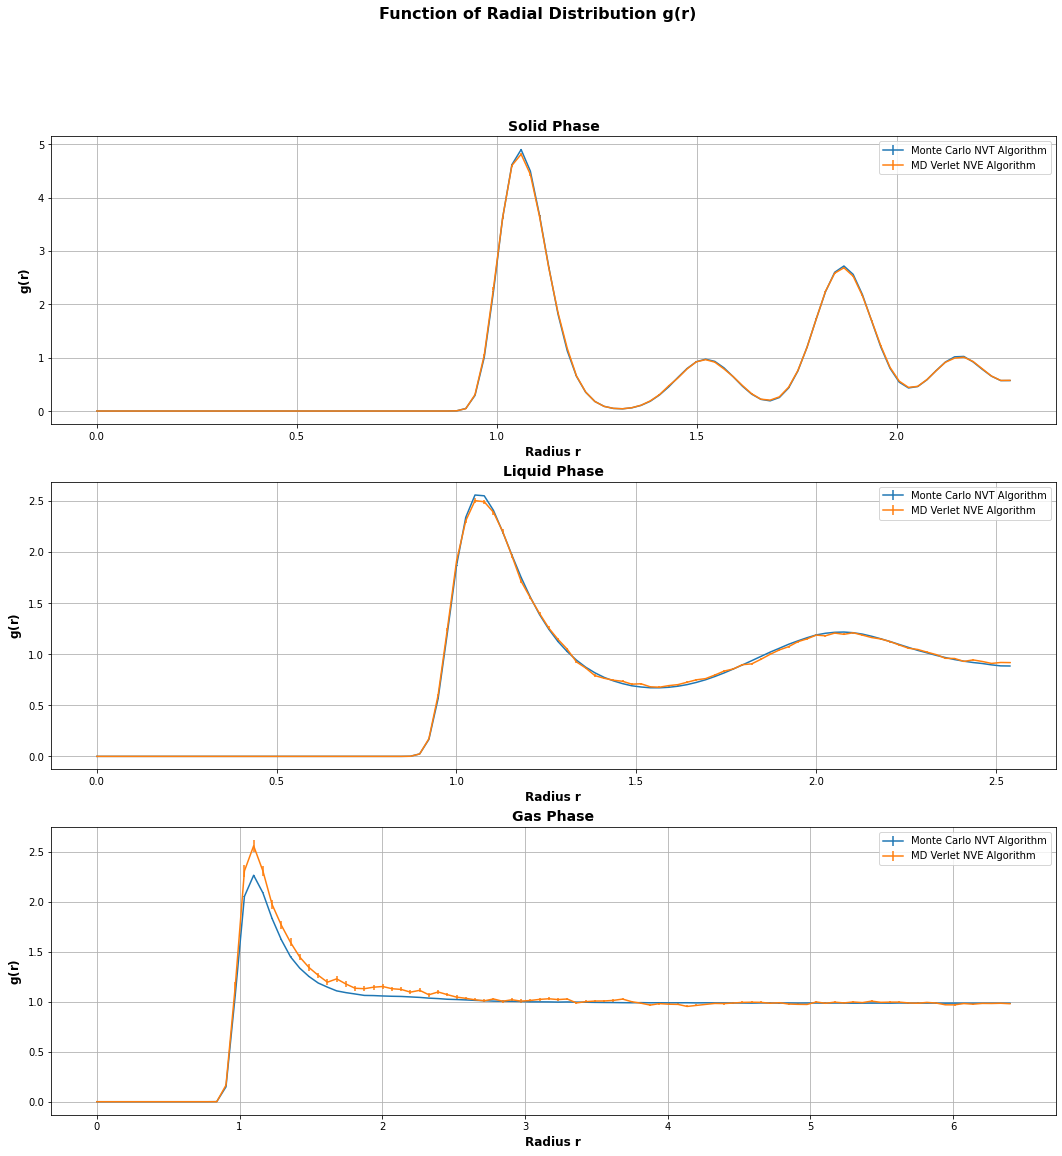

In [171]:
r_solid, gr_solid, err_gr_solid = np.loadtxt("output/solid/output.gave.0", unpack=True)
r_MD_solid, gr_MD_solid, err_gr_MD_solid = np.loadtxt("MD/output/solid/output.gave.0", unpack=True)
r_liquid, gr_liquid, err_gr_liquid = np.loadtxt("output/liquid/output.gave.0", unpack=True)
r_MD_liquid, gr_MD_liquid, err_gr_MD_liquid = np.loadtxt("MD/output/liquid/output.gave.0", unpack=True)
r_gas, gr_gas, err_gr_gas = np.loadtxt("output/gas/output.gave.0", unpack=True)
r_MD_gas, gr_MD_gas, err_gr_MD_gas = np.loadtxt("MD/output/gas/output.gave.0", unpack=True)

fig = plt.figure(figsize = (18,18))

fig.suptitle("Function of Radial Distribution g(r)", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(311)
plt.errorbar(r_solid,gr_solid,yerr=err_gr_solid, label = "Monte Carlo NVT Algorithm")
plt.errorbar(r_MD_solid,gr_MD_solid,yerr=err_gr_MD_solid, label = "MD Verlet NVE Algorithm")


ax.set_title(r'Solid Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'Radius r', fontweight = "bold", fontsize = 12)
ax.set_ylabel(r'$\mathbf{g(r)}$', fontweight = "bold", fontsize = 12)
ax.grid()
ax.legend()

ax = fig.add_subplot(312)
plt.errorbar(r_liquid,gr_liquid,yerr=err_gr_liquid, label = "Monte Carlo NVT Algorithm")
plt.errorbar(r_MD_liquid,gr_MD_liquid,yerr=err_gr_MD_liquid, label = "MD Verlet NVE Algorithm")

ax.set_title(r'Liquid Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'Radius r', fontweight = "bold", fontsize = 12)
ax.set_ylabel(r'$\mathbf{g(r)}$', fontweight = "bold", fontsize = 12)
ax.grid()
ax.legend()

ax = fig.add_subplot(313)
plt.errorbar(r_gas,gr_gas,yerr=err_gr_gas, label = "Monte Carlo NVT Algorithm")
plt.errorbar(r_MD_gas,gr_MD_gas,yerr=err_gr_MD_gas, label = "MD Verlet NVE Algorithm")

ax.set_title(r'Gas Phase',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'Radius r', fontweight = "bold", fontsize = 12)
ax.set_ylabel(r'$\mathbf{g(r)}$', fontweight = "bold", fontsize = 12)
ax.grid()
ax.legend()

plt.grid(True)

I due algoritmi utilizzati sono compatibili, soprattutto per quanto riguarda le fasi solida e liquida. L'algoritmo Monte Carlo presenta un errore minore ed  un andamento più continuo rispetto all'algoritmo di Verlet. 